In [285]:
import numpy as np
import control as cnt
from scipy.linalg import expm
import matplotlib.pyplot as plt

In [286]:
# Define the system transfer function
R1 = 10e3
C1 = 1e-6
R2 = 15e3
C2 = 1e-6
# num = [1]
# den = [(R1*C1*R2*C2), (R1*C1+R1*C2+R2*C2), 1]
# sys = cnt.tf(num, den)

A = [[-(1/R1+1/R2)/C1, 1/(R2*C1)], [1/(R2*C2), -1/(R2*C2)]]
B = [[1/(R1*C1)],[0]]
C = [0, 1]

h = 0.005
sys = cnt.ss(A, B, C, 0)

hz = cnt.c2d(sys,h)
num, den = cnt.tfdata(hz)

ss = cnt.tf2ss(num,den)

t = np.linspace(h, h * 100, 100)
u = np.concatenate((np.zeros(int(len(t) / 2)), np.ones(int(len(t) / 2))), axis=None)

t_hz_open, y_hz_open = cnt.forced_response(hz, t, u)

print(sys)
print(A)
print(B)
print(C)
print(ss)


<StateSpace>: sys[236]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[-166.66666667   66.66666667]
     [  66.66666667  -66.66666667]]

B = [[100.]
     [  0.]]

C = [[0. 1.]]

D = [[0.]]

[[-166.66666666666669, 66.66666666666667], [66.66666666666667, -66.66666666666667]]
[[100.0], [0]]
[0, 1]
<StateSpace>: sys[239]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[ 1.21436117 -0.31140322]
     [ 1.          0.        ]]

B = [[1.]
     [0.]]

C = [[0.05779782 0.03924424]]

D = [[0.]]



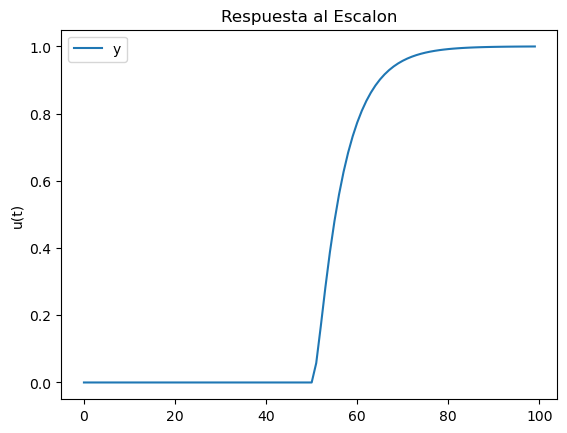

In [287]:
p_1 = plt.plot(y_hz_open)
plt.ylabel('u(t)')
plt.title('Respuesta al Escalon')
plt.legend('y(t)');

In [288]:
poles = [0.6 + 0.2j, 0.6 - 0.2j]
# poles_s = cnt.poles(sys)

# poles = np.exp(poles_s*1.7*h)

# print(poles)

K = cnt.place(ss.A, ss.B, poles)

Phi_LC = ss.A - ss.B * K

print(Phi_LC)
ss.A
ss.B



[[ 1.2 -0.4]
 [ 1.   0. ]]


array([[1.],
       [0.]])

In [289]:
hz_pp = cnt.ss2tf(Phi_LC, ss.B, ss.C, ss.D, h)
hz_pp

TransferFunction(array([0.05779782, 0.03924424]), array([ 1. , -1.2,  0.4]), 0.005)

In [290]:
t = np.linspace(h, h * 100, 100)
r = np.concatenate((np.zeros(int(len(t) / 2)), np.ones(int(len(t) / 2))), axis=None)

In [291]:
t_hz_pp, y_hz_pp = cnt.forced_response(hz_pp, t, r)

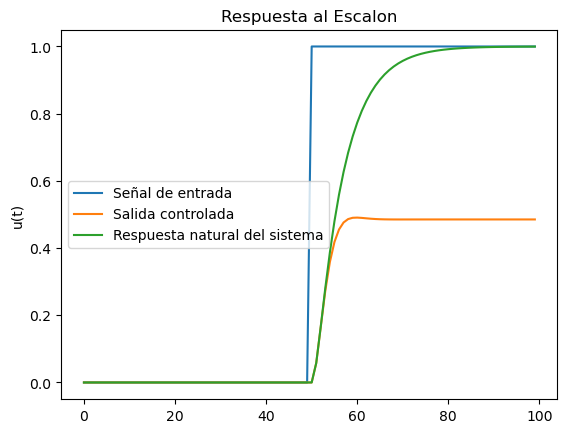

In [292]:
p_1 = plt.plot(r)
p_2 = plt.plot(y_hz_pp)
p_3 = plt.plot(y_hz_open)
plt.ylabel('u(t)')
plt.title('Respuesta al Escalon')
plt.legend((p_1[0], p_2[0], p_3[0]), ('Señal de entrada', 'Salida controlada', 'Respuesta natural del sistema'))

In [293]:
K = cnt.place(ss.A, ss.B, poles)

Phi_LC = ss.A - ss.B * K

P = cnt.poles(sys)

Po = np.array([-10*np.max(np.abs(P)),-11*np.max(np.abs(P))])

Pod = np.exp(Po*h)

L = cnt.place(ss.A, ss.B, Pod)
print(L)

print(K)

[[0.01436117 0.08859678]]


In [294]:
temp1 = np.linalg.inv(np.eye(2) - Phi_LC)
temp2 = np.matmul(ss.C, temp1)
g = np.matmul(temp2, ss.B)
K0 = 1 / g

Gamma_LC = ss.B * K0

print(K0)

[[2.06096207]]


In [295]:
hz_pp = cnt.ss2tf(Phi_LC, Gamma_LC, ss.C, ss.D, h)
hz_pp

TransferFunction(array([0.11911911, 0.08088089]), array([ 1. , -1.2,  0.4]), 0.005)

In [296]:
t_hz_pp, y_hz_pp = cnt.forced_response(hz_pp, t, r)

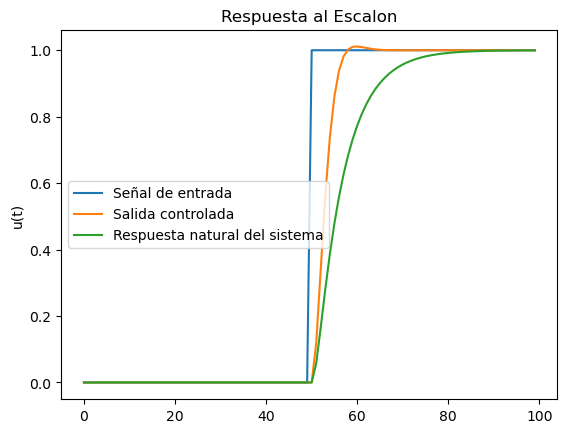

In [297]:
p_1 = plt.plot(r)
p_2 = plt.plot(y_hz_pp)
p_3 = plt.plot(y_hz_open)
plt.ylabel('u(t)')
plt.title('Respuesta al Escalon')
plt.legend((p_1[0], p_2[0], p_3[0]), ('Señal de entrada', 'Salida controlada', 'Respuesta natural del sistema'));

In [298]:
# Calcular tiempo de subida
def tiempo_de_subida(t, y):
    y_final = y[-1]
    y_10 = 0.1 * y_final
    y_90 = 0.9 * y_final

    t_10 = next(t[i] for i in range(len(y)) if y[i] >= y_10)
    t_90 = next(t[i] for i in range(len(y)) if y[i] >= y_90)

    return t_90 - t_10

tr = tiempo_de_subida(t_hz_pp, y_hz_pp) * 1000
print(f"Tiempo de subida lazo abierto: {tr:.2f}ms")

sobrepico = np.max(y_hz_pp) - np.max(y_hz_open)
print(sobrepico)
print(f"Sobrepico: {sobrepico*100:.2f}%")

Tiempo de subida lazo abierto: 25.00ms
0.011641927119233508
Sobrepico: 1.16%


In [299]:
P = cnt.poles(sys)

Po = np.array([-10*np.max(np.abs(P)),-11*np.max(np.abs(P))])

Pod = np.exp(Po*h)

L = cnt.place(ss.A, ss.B, Pod)
L

array([[ 1.21429906, -0.31140322]])